# 2016 Global Ecological Footprint
---

:מגישות    
גילי עובד , רננה פריד, מרינה נז'לסקי, ירדן אנגלמאיר

מספר קבוצה: 14


githubקישור ל:   
https://github.com/footprint14/footprint14/tree/main

Kaggleקישור ל:   
https://www.kaggle.com/datasets/footprintnetwork/ecological-footprint

:nbViewerקישור ל    
https://nbviewer.org/github/footprint14/footprint14/blob/main/14.ipynb
(על מנת לראות את המפה)

---

1. [הקדמה](#section1)
2. [ניקוי וסידור הדאטה](#section2)
3. [בדיקת קורלציות](#section3)
4. [?מהו הקשר בין מדד הפיתוח האנושי לבין טביעות הרגלים האקולוגית השונות](#section4)
5. [ישראל](#section5)
6. [יום החוב האקולוגי](#section6)
7. [מסקנות מעניינות נוספות שמצאנו](#section7)

<div>
<img src="https://github.com/footprint14/footprint14/blob/main/footprint%20photo.jpg?raw=true" width="700"/>
</div>

<a id='section1'></a>
# הקדמה

.טביעת רגל אקולוגית היא מדד לביקוש האנושי למערכות אקולוגיות בכדור הארץ  
.זהו ניסיון לכמת ולהגדיר כמדד את שטח האדמה והמים הנדרש על מנת לספק את הצרכים ולקלוט את חומרי הפסולת של אוכלוסייה בעלת אורח חיים נתון   
.חשוב מאוד שנדע את טביעת הרגל האקולוגית שלנו ובכך נתרום למאמץ של ניצול מקורות הטבע בצורה חכמה ומושכלת   
בעבודה זו ננתח את הנתונים המוצגים משנת 2016, (ביחידות של דונם לנפש)   
.נחפש קורלציות בין התחומים השונים, ונסיק מסקנות על אופי החיים של המדינות השונות ואת ההשפעות על טביעת הרגל האקולוגית הגלובלית 

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date,datetime,timedelta
import folium

In [30]:
url='https://raw.githubusercontent.com/footprint14/footprint14/main/countriesFootprint.csv'
data_base= pd.read_csv(url)

---

<a id='section2'></a>
# ניקוי וסידור הדאטה 

:בדיקת סוג העמודות

In [31]:
data_base.dtypes

Country                            object
Region                             object
Population (millions)             float64
HDI                               float64
GDP per Capita                     object
Cropland Footprint                float64
Grazing Footprint                 float64
Forest Footprint                  float64
Carbon Footprint                  float64
Fish Footprint                    float64
Total Ecological Footprint        float64
Cropland                          float64
Grazing Land                      float64
Forest Land                       float64
Fishing Water                     float64
Urban Land                        float64
Total Biocapacity                 float64
Biocapacity Deficit or Reserve    float64
Earths Required                   float64
Countries Required                float64
Data Quality                       object
dtype: object

.תחילה ננקה שורות בהן יש ערכים חסרים ועמודות אשר אינן רלוונטיות לנושא בו נרצה להתמקד

In [32]:
data_base.dropna(inplace=True)
data_base['GDP per Capita'] = data_base['GDP per Capita'].str.replace('$','',regex=False)
data_base['GDP per Capita'] = data_base['GDP per Capita'].str.replace(',','',regex=False).astype('float')
data_df=data_base.reset_index().drop(columns=['index','Cropland','Grazing Land','Forest Land','Fishing Water','Countries Required','Data Quality'])
data_df

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required
0,Afghanistan,Middle East/Central Asia,29.82,0.460000,614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.04,0.60,-0.30,0.46
1,Albania,Northern/Eastern Europe,3.16,0.730000,4534.37,0.78,0.22,0.25,0.87,0.02,2.21,0.06,1.28,-1.03,1.27
2,Algeria,Africa,38.48,0.730000,5430.57,0.60,0.16,0.17,1.14,0.01,2.12,0.03,0.69,-1.53,1.22
3,Angola,Africa,20.82,0.520000,4665.91,0.33,0.15,0.12,0.20,0.09,0.93,0.04,2.35,1.61,0.54
4,Argentina,Latin America,41.09,0.830000,13540.00,0.78,0.79,0.29,1.08,0.10,3.14,0.10,7.22,3.78,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Venezuela,Latin America,29.96,0.763846,10237.80,0.45,0.74,0.12,2.13,0.09,3.57,0.04,2.78,-0.79,2.06
158,Vietnam,Asia-Pacific,90.80,0.660000,1532.31,0.50,0.01,0.19,0.79,0.05,1.65,0.10,1.00,-0.65,0.95
159,Yemen,Middle East/Central Asia,23.85,0.500000,1302.30,0.34,0.14,0.04,0.42,0.04,1.03,0.04,0.60,-0.53,0.59
160,Zambia,Africa,14.08,0.580000,1740.64,0.19,0.18,0.33,0.24,0.01,0.99,0.04,2.23,1.24,0.57


.החלטנו לא להתייחס למדינות בדאטה בהן היו ערכים חסרים, מכיוון שהכמות שלהן היא מינורית ולא משמעותית בניתוח הנתונים ביחס לכמות הנתונים שיש על שאר העולם

---

<a id='section3'></a>

# בדיקת קורלציות

<AxesSubplot:>

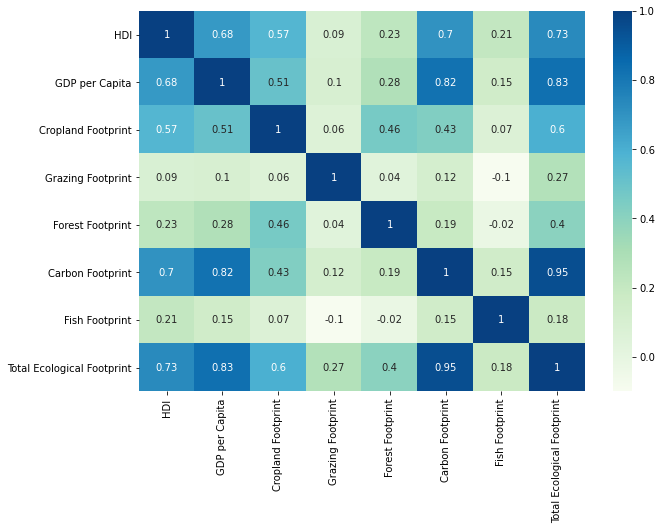

In [33]:
features= ['HDI','GDP per Capita','Cropland Footprint','Grazing Footprint','Forest Footprint','Carbon Footprint','Fish Footprint','Total Ecological Footprint']
figure = plt.figure(figsize=(10,7))
correlations= data_df[features].corr().round(2)
sns.heatmap(data=correlations,cmap= 'GnBu',annot=True)

.ניתן לראות שהקשר החזק ביותר הוא בין **טביעת הרגל האקולוגית הכוללת לטביעת הרגל הפחמנית**   
מכאן ניתן להסיק שטביעת הרגל הפחמנית היא הדומיננטית ביותר מבין שאר טביעות הרגל, וזאת כתוצאה מהשימוש הרב במוצרים ושירותים הפולטים גזי חממה ופחמן לאוויר, ביניהם מפעלים, מכוניות, חשמל וכדומה   
.עובדה זו מחזקת את הסיבה לכך שכדור הארץ נמצא במגמת התחממות עולמית הנובעת עקב גזי חממה   
.תהליך זה החל בהדרגה כתוצאה מהמהפכה התעשייתית, והוא מתרחש בקצב חסר תקדים במהלך מאה השנים האחרונות

---



**:נציג את מפת העולם המתארת את טביעת הרגל האקולוגית הכוללת של כל מדינה**

In [35]:
url = 'https://raw.githubusercontent.com/footprint14/footprint14/main'
country_shapes = f'{url}/world-countries.geojson'
my_map=folium.Map(location=[13, 13],zoom_start=2)
folium.Choropleth(geo_data=country_shapes,data=data_df,name='choropleth',columns=["Country","Total Ecological Footprint"],key_on="feature.properties.name",fill_color="RdYlGn_r",fill_opacity=0.7,line_opacity=0.2,
    legend_name="Total Ecological Footprint").add_to(my_map)
my_map

<a id='section4'></a>

# ?מהו הקשר בין מדד הפיתוח האנושי לבין טביעות הרגל האקולוגית השונות

**(HDI) מדד הפיתוח האנושי**   
הוא מדד המשמש כלי השוואה בין רמת התפתחותן של מדינות שונות. לכל מדינה ניתן ציון בין 0 ל-1 המהווה את תוחלת החיים, השכלה ורמת ההכנסה באותה מדינה   

:נציג בגרפים שונים את טביעות הרגל השונות כפונקציה של מדד הפיתוח האנושי

<AxesSubplot:xlabel='HDI', ylabel='Total Ecological Footprint'>

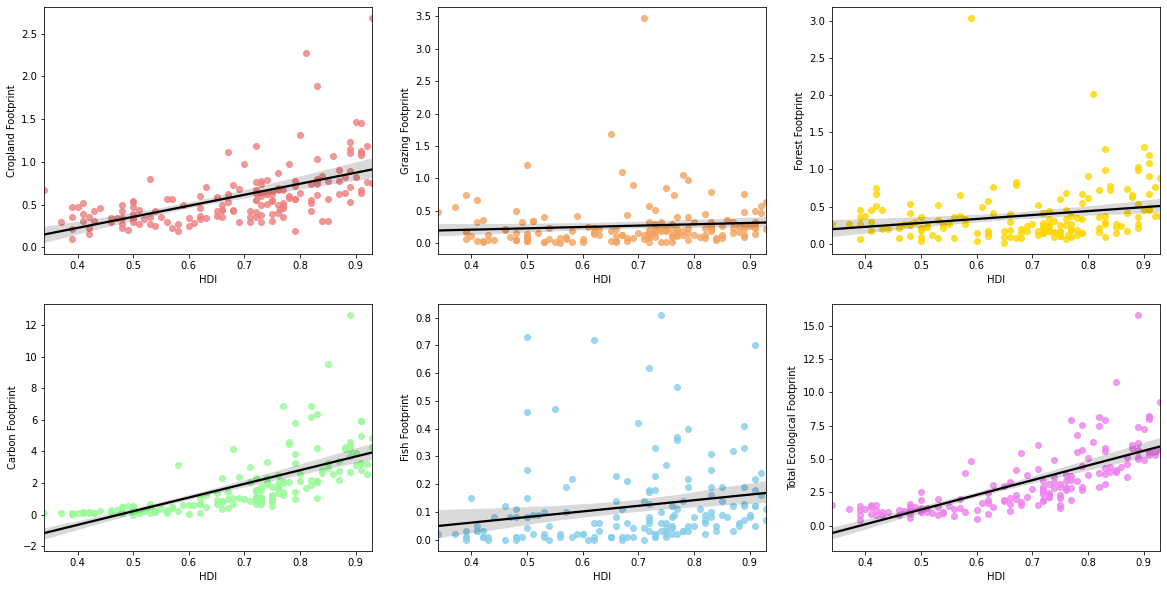

In [36]:
fig, axes = plt.subplots(2,3,figsize=(20, 10))
sns.regplot(data = data_df, x = 'HDI', y = 'Cropland Footprint',ax = axes[0,0],scatter_kws={"color": "lightcoral"}, line_kws={"color": "black"})
sns.regplot(data = data_df, x = 'HDI', y = 'Grazing Footprint',ax = axes[0,1],scatter_kws={"color": "sandybrown"}, line_kws={"color": "black"})
sns.regplot(data = data_df, x = 'HDI', y = 'Forest Footprint',ax = axes[0,2],scatter_kws={"color": "gold"}, line_kws={"color": "black"})
sns.regplot(data = data_df, x = 'HDI', y = 'Carbon Footprint',ax = axes[1,0],scatter_kws={"color": "palegreen"}, line_kws={"color": "black"})
sns.regplot(data = data_df, x = 'HDI', y = 'Fish Footprint',ax = axes[1,1],scatter_kws={"color": "skyblue"}, line_kws={"color": "black"})
sns.regplot(data = data_df, x = 'HDI', y = 'Total Ecological Footprint',ax = axes[1,2],scatter_kws={"color": "violet"}, line_kws={"color": "black"})

> ### מסקנה 1-א   
>.על פי הגרפים ומפת החום, ניתן לראות שיש קשר ישיר בין מדד הפיתוח האנושי לבין כל סוגי טביעות הרגל האקולוגיות   
>.בכל הגרפים ישנה מגמת עליה אשר מצביעה על כך שככל שמדינה מופתחת יותר כך היא משאירה טביעת רגל אקולוגית גדולה יותר

---

## מדינות מפותחות לעומת מדינות מתפתחות

.**מדינה מתפתחת**- מדינה שבה קיימת רמה נמוכה של רווחה חומרית לתושביה, כגון תשתיות, טכנולוגיה, השכלה, כלכלה, בריאות ושירותים 

.מדינה מתפתחת מאופיינת במדד הפיתוח האנושי הקטן מ-0.8

.**מדינה מפותחת**- מדינה המאופיינת באיכות חיים גבוהה ושכלכלתה מגוונת ומבוססת באופן משמעותי על תעשיית מידע מחקר ופיתוח

.מדינה מפותחת מאופיינת במדד הפיתוח האנושי הגדול מ-0.8

In [37]:
data_HDI= data_df.loc[:,['Country','HDI','Total Ecological Footprint']]
data_HDI=data_HDI.sort_values('HDI',ascending=False).reset_index().drop(columns=['index'])
data_HDI

,Country,HDI,Total Ecological Footprint
0,Switzerland,0.93,5.79
1,Australia,0.93,9.31
2,Denmark,0.92,5.51
3,Netherlands,0.92,5.28
4,Ireland,0.91,5.57
...,...,...,...
157,Chad,0.39,1.46
158,Burundi,0.39,0.80
159,Burkina Faso,0.39,1.21
160,Central African Republic,0.37,1.24


In [38]:
develop=data_HDI.loc[data_HDI.HDI>=(0.8)].mean()
undevelop=data_HDI.loc[data_HDI.HDI<(0.8)].mean()
dev_df=pd.DataFrame([develop, undevelop],columns=['HDI','Total Ecological Footprint'])  
dev_df= dev_df.rename({0:'developed',1:'undeveloped'}).reset_index()
dev_df

,index,HDI,Total Ecological Footprint
0,developed,0.867381,5.950000
1,undeveloped,0.620365,2.291333


Text(0.5, 0, 'Country type')

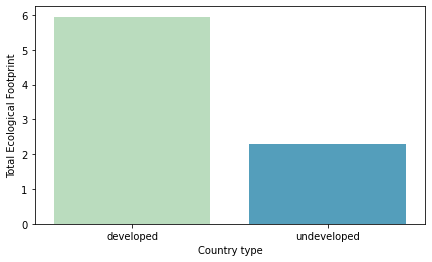

In [39]:
figure = plt.figure(figsize=(7,4))
sns.barplot(x='index',y="Total Ecological Footprint", data=dev_df,palette='GnBu')
plt.xlabel('Country type')


>### מסקנה 1-ב     
>.על פי הגרף הנ"ל ניתן להסיק שמדינות מפותחות משתמשות ביותר משאבים וטביעת הרגל האקולוגית שלהן גדולה יותר לעומת מדינות מתפתחות   
>.מסקנה זו נגזרת מהעובדה שבמדינות מפותחות הביקוש למשאבים גדול יותר ולכן ישנה כמות גדולה יותר של מפעלים, משק חקלאות מפותח יותר וכדומה   
> .כמו כן, ניתן לראות על גבי המפה הגאוגרפית שרוב יבשת אפריקה "ירוקה" מכיוון שביבשת אפריקה כל המדינות הן מתפתחות

---


<a id='section5'></a>

# ישראל

:נבחן את המדינה שלנו לעומת שאר העולם

In [40]:
israel_df=data_df.loc[data_df.Country== 'Israel']
israel_df

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required
69,Israel,Middle East/Central Asia,7.64,0.89,33718.9,0.89,0.22,0.36,4.59,0.07,6.22,0.08,0.35,-5.87,3.59


<AxesSubplot:>

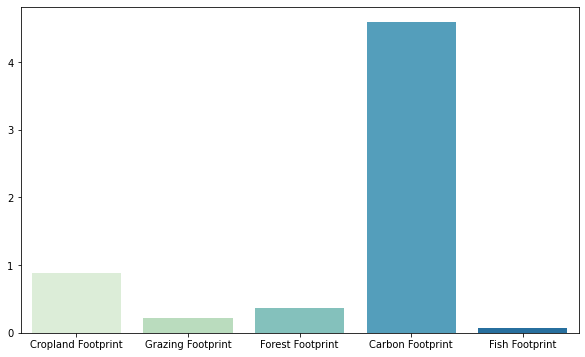

In [41]:
new_israel=['Cropland Footprint','Grazing Footprint','Forest Footprint','Carbon Footprint','Fish Footprint']
figure = plt.figure(figsize=(10, 6))
sns.barplot(data= israel_df[new_israel],palette='GnBu')

.ניתן לראות שטביעת הרגל הפחמנית היא הגדולה ביותר מבין כולם

### ישראל ביחס לשאר מדינות העולם

In [42]:
data_HDI[data_HDI.Country== 'Israel']


,Country,HDI,Total Ecological Footprint
12,Israel,0.89,6.22


.ניתן לראות על פי מדד הפיתוח האנושי שישראל היא מדינה מפותחת (0.89)   
.מדינת ישראל נמצאת במקום ה-12

Text(0.5, 1.0, 'Total Ecological Footprint')

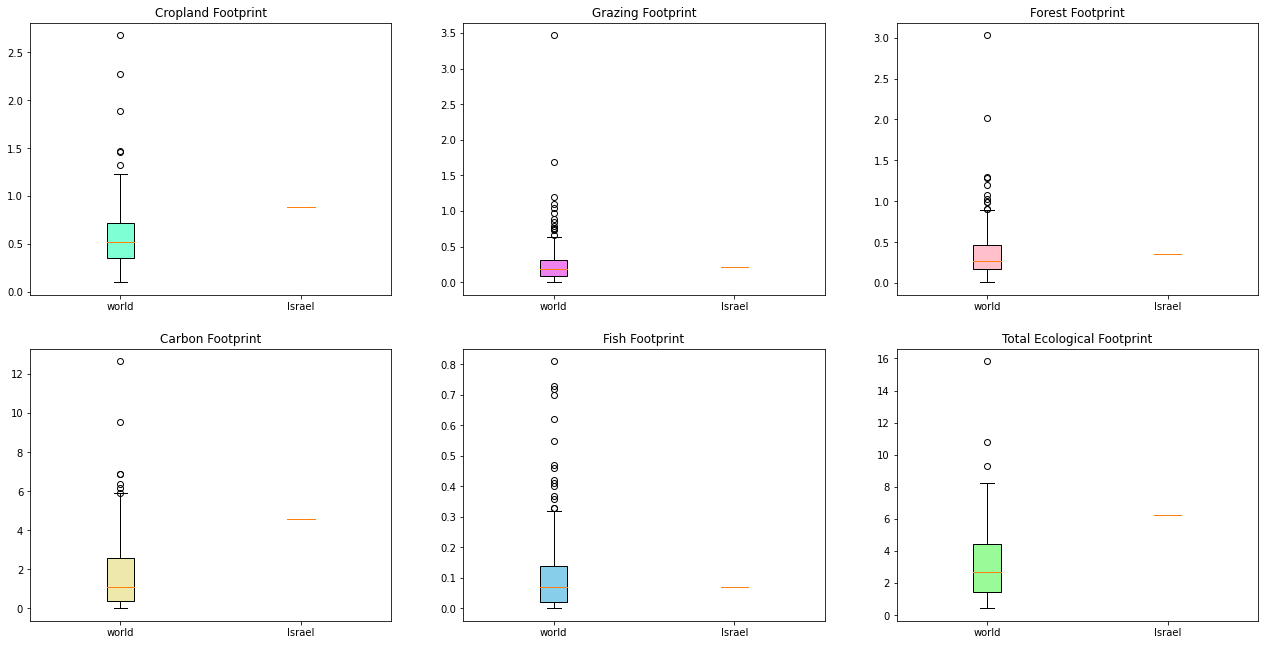

In [43]:
x_Lable=['World','Israel']
fig, axes = plt.subplots(2,3,figsize=(22, 11))
axes[0, 0].boxplot([data_df['Cropland Footprint'],israel_df['Cropland Footprint']],patch_artist=True,boxprops=dict(facecolor="aquamarine"))
axes[0, 0].set_title('Cropland Footprint')
axes[0, 1].boxplot([data_df['Grazing Footprint'],israel_df['Grazing Footprint']],patch_artist=True,boxprops=dict(facecolor="violet"))
axes[0, 1].set_title('Grazing Footprint')
axes[0, 2].boxplot([data_df['Forest Footprint'],israel_df['Forest Footprint']],patch_artist=True,boxprops=dict(facecolor="pink"))
axes[0, 2].set_title('Forest Footprint')
axes[1, 0].boxplot([data_df['Carbon Footprint'],israel_df['Carbon Footprint']],patch_artist=True,boxprops=dict(facecolor="palegoldenrod"))
axes[1, 0].set_title('Carbon Footprint')
axes[1, 1].boxplot([data_df['Fish Footprint'],israel_df['Fish Footprint']],patch_artist=True,boxprops=dict(facecolor="skyblue"))
axes[1, 1].set_title('Fish Footprint')
axes[1, 2].boxplot([data_df['Total Ecological Footprint'],israel_df['Total Ecological Footprint']],patch_artist=True,boxprops=dict(facecolor="palegreen"))
plt.setp(axes, xticks=[1, 2],  xticklabels=['world', 'Israel'])
axes[1, 2].set_title('Total Ecological Footprint')

>### מסקנה 2
>.ניתן לראות על פי כל הגרפים שישראל נמצאת מעל החציון ברוב התחומים   
>.התוצאות מחזקות את העובדה שישראל היא מדינה מפותחת (עם מדד פיתוח אנושי של 0.89)    
> .לפי הגרפים ישראל בולטת ברמת פליטות גזי החממה וחקלאות,ניתן להסביר תוצאות אלה עקב צריכה גבוהה לנפש של שירותים ומוצרים      
>.בנוסף לכך, יחסית לשטח המדינה וגודל האוכלוסיה, השטח המוקדש לחקלאות הוא גבוהה

---
<a id='section6'></a>

# יום החוב האקולוגי   

.יום החוב האקלוגי, הידוע גם בשם יום סיום המשאבים, הוא התאריך בו דרישות הצריכה של האנושות עולות על כמות המשאבים שכדור הארץ יכול לחדש באותה השנה   
.בהסתכלות כלכלית, יום החוב האקולוגי השנתי מייצג את היום בו תם ה"תקציב" השנתי של כדור הארץ, האנושות נכנסת לגירעון תקציבי סביבתי ולמעשה צורכת משאבים על חשבון השנים הבאות

חישוב תאריך סיום המשאבים נעשה על ידי חלוקת היכולת האקולוגית העולמית (כמות משאבי הטבע שנוצרו על ידי כדור הארץ באותה שנה), בטביעת הרגל האקולוגית העולמית   
.והכפלתה ב-365 (366 בשנים מעוברות)- מספר הימים בשנה   

:נחשב תחילה את היכולת האקולוגית העולמית

In [44]:
total_cap=data_df['Total Biocapacity'].median()
total_cap

1.585

:כעת נחשב את טביעת הרגל האקולוגית העולמית

In [45]:
total_footprint=data_df['Total Ecological Footprint'].median()
total_footprint

2.68

In [46]:
EOD=(total_cap/total_footprint)*366
int(EOD)

216

**:התאריך המשוער של יום החוב האקולוגי לשנת 2016**

In [47]:
start_date = date(2016, 1, 1)
end_date= start_date+timedelta(int(EOD))
end_date

datetime.date(2016, 8, 4)

### דאטה של יום החוב האקולוגי משנים קודמות   
להלן קובץ נתונים של יום החוב האקולוגי משנת 1970 (הפעם הראשונה שצריכת בני האדם עברה סף קריטי והחלה לעלות על מה שכדור הארץ יכול להפיק)   

In [48]:
url2='https://raw.githubusercontent.com/footprint14/footprint14/main/overshoot-day.csv'
overshoot_df= pd.read_csv(url2)
overshoot_df

,Year,Date,Full date,Days of year passed,Days in a year,Days left in a year,Percentage of year Earth lasted,Percentage of year left when Earth run out
0,1970,December 29,12/29/1970,362,365,3,99.18,0.82
1,1971,December 20,12/20/1971,353,365,12,96.71,3.29
2,1972,December 10,12/10/1972,344,366,22,93.99,6.01
3,1973,November 26,11/26/1973,329,365,36,90.14,9.86
4,1974,November 27,11/27/1974,330,365,35,90.41,9.59
5,1975,November 30,11/30/1975,333,365,32,91.23,8.77
6,1976,November 16,11/16/1976,320,366,46,87.43,12.57
7,1977,November 11,11/11/1977,314,365,51,86.03,13.97
8,1978,November 7,11/07/1978,310,365,55,84.93,15.07
9,1979,October 29,10/29/1979,301,365,64,82.47,17.53


.כשאנו חישבנו על פי הדאטה שלנו את התאריך שבו נגיע לגרעון אקולוגי קיבלנו שהוא 04.08.2016 ועפ"י הדאטה של יום החוב האקולוגי התאריך הוא 05.08.2016      
.נשער שהפער המזערי שנוצר בין התאריכים הינו בעקבות ניקוי הדאטה אשר ביצענו בתחילת הפרויקט   


:נציג את מגמת השינוי של יום החוב האקולוגי במהלך השנים בגרף

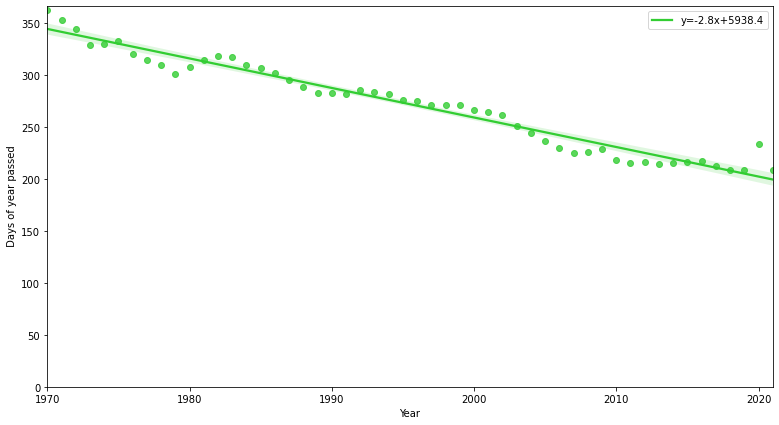

In [49]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(overshoot_df['Year'],overshoot_df[' Days of year passed'])
ax = sns.regplot(x='Year', y=' Days of year passed',color="limegreen", data=overshoot_df, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.ylim(0,366)
ax.figure.set_size_inches(13, 7)
ax.legend()

.ניתן לראות שבשנת 2020 ישנו ערך חריג  
.בשנה זו יום החוב האקולוגי חל ב-22 באוגוסט, שלושה שבועות מאוחר יותר מבשנה הקודמת, וזאת בעקבות מגפת הקורונה בה היה צימצום משמעותי בטביעת הרגל האקולוגית

**:נחזה את השנה שבה יום החוב האקולוגי יתקיים בתחילת השנה**

In [50]:
dueyear=(0-intercept)/slope
dueyear

2091.2182135233456

>### מסקנה 3
>.מצאנו שבשנת 2091 צריכת בני האדם תעבור סף קריטי וכדור הארץ לא יספיק להפיק את המשאבים הדרושים עוד מתחילת השנה   
>.כלומר, בשנה הזאת יום החוב האקולוגי יתחיל כבר עם תחילת השנה בראשון לינואר   
>.זהו מצב קטסטרופלי שאסור לנו להגיע אליו, אך עם הקצב הצריכה הנוכחי של העידן המודרני זהו העתיד הצפוי לנו   
>.אנו חייבים לעשות מאמץ על מנת לא להגיע למצב זה, והשינוי מתחיל בכל פרט ופרט

<div>
<img src="https://github.com/footprint14/footprint14/blob/main/save%20the%20earth%20photo.jpg?raw=true" width="500"/>
</div>

---
<a id='section7'></a>
# מסקנות מעניינות נוספות שמצאנו

### המדינה בעלת טביעת הרגל האקולוגית הגדולה ביותר

In [51]:
maxi=data_df['Total Ecological Footprint'].max()
data_df[data_df['Total Ecological Footprint']==maxi]

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required
86,Luxembourg,European Union,0.52,0.89,114665.0,1.1,0.76,1.03,12.65,0.13,15.82,0.14,1.68,-14.14,9.14


.לוקסמבורג בעלת טביעת הרגל האקולוגית הגדולה ביותר עקב פליטת הפחמן הגבוהה מאד  
.מבדיקה שערכנו, תורם גדול לפליטת הפחמן הקטסטרופלית של לוקסמבורג הוא שיעור הבעלות על מכוניות הפרטיות, כמו גם צריכת האנרגיה לנפש, שניהם הגבוהים באירופה  
.ללוקסמבורג אין הרבה אנרגיה הנצרכת ממקורות מתחדשים , מה שמוסיף למאזן הפחמן השלילי

### "המדינה ה"אידיאלית

.נגדיר את המדינות האידאיליות כך שמדד הפיתוח האנושי הוא מעל 0.8 (מדינה מפותחת) וגם היחס בין מדד הפיתוח האנושי לבין טביעת הרגל האקולוגית הכוללת הוא הנמוך ביותר 

In [52]:
develop=data_HDI.loc[data_HDI.HDI>=(0.8)].copy()
develop['ratio']=(develop['Total Ecological Footprint']/develop['HDI'])
develop.sort_values('ratio').head()

,Country,HDI,Total Ecological Footprint,ratio
37,Hungary,0.82,2.92,3.560976
33,Argentina,0.83,3.14,3.783133
21,Spain,0.87,3.67,4.218391
32,Portugal,0.83,3.88,4.674699
40,Montenegro,0.80,3.78,4.725000


."ניתן לראות שהונגריה מדינה מפותחת ויחסית למדד הפיתוח שלה, יש לה טביעת רגל קטנה מבין כל המדינות המפותחות. לכן נגדיר אותה כמדינה "אידיאלית   

In [26]:
data_df.loc[data_df.Country=='Hungary']

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required
63,Hungary,European Union,9.98,0.82,13964.2,0.42,0.08,0.36,1.9,0.02,2.92,0.13,2.17,-0.75,1.69


.אך בכל זאת, אם כל מדינות העולם היו ברמת אקולוגיה ופיתוח כמו הונגריה, היינו צריכים כ1.7 כדורי ארץ כדי לספק את כל המשאבים הדרושים

### ?מהו הקשר בין תוצר מקומי גולמי לפליטת גזי חממה    

.תוצר מקומי גולמי הוא הערך הכולל של סחורות ושירותים שיוצרו בשטח מדינה מסוימת. המדד מתייחס לכמות גזי החממה הנפלטים כתוצאה מפעילות אנושית כגון תחבורה , תעשייה ושימוש בחשמל   
.נצפה שבמדינות בהן התמ"ג גבוה, הדבר יהיה כתוצאה משימוש רב במשאבים ודלקים מזהמים (למשל במפעלים)

In [27]:
richest=data_df['GDP per Capita'].max()
poorest=data_df['GDP per Capita'].min()
data_df[data_df['GDP per Capita']==richest]
both= data_df.loc[(data_df['GDP per Capita']== richest) | (data_df['GDP per Capita']== poorest)]
both.loc[:,['Country','GDP per Capita','Carbon Footprint']]

,Country,GDP per Capita,Carbon Footprint
24,Burundi,276.69,0.04
86,Luxembourg,114665.00,12.65


.ניתן לראות שטביעת הרגל הפחמנית של בורונדי נמוכה משמעותית מלוקסמברוג וכך גם התמ"ג   
:מכאן ניתן לחפש את קשר בין פליטת פחמן לבין תמ"ג. נציג אותו בגרף

<AxesSubplot:xlabel='GDP per Capita', ylabel='Carbon Footprint'>

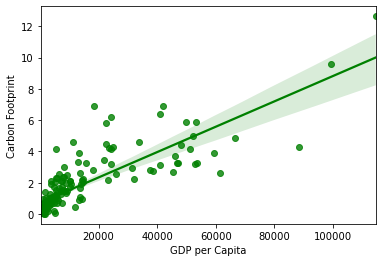

In [28]:
sns.regplot(x='GDP per Capita',y= 'Carbon Footprint',data= data_df ,color='Green')

.מצאנו שככל שהתוצר המקומי הגולמי גבוה יותר,כך פליטת הפחמן גבוהה יותר   
.כפי ששיערנו, רוב התוצר המקומי הגולמי מקורו במפעלים, שירותים ומוצרים (כגון שיעור בעלות גבוהה על מכוניות פרטיות), לכן יש קשר חיובי בין תמ"ג לטביעת רגל פחמנית 